# Import libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

Variable Description

    Age: Age of patient
    Sex: Gender of patient
    BP: Blood pressure of patient
    Cholesterol: Cholesterol of patient
    Na_to_K: Sodium to Potassium Ratio in Blood
    Drug: Drug Type

In [2]:
drug_data=pd.read_csv("drug.csv")
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Check datatypes and null values

In [3]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
drug_data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# Data Analysis

<Figure size 648x360 with 0 Axes>

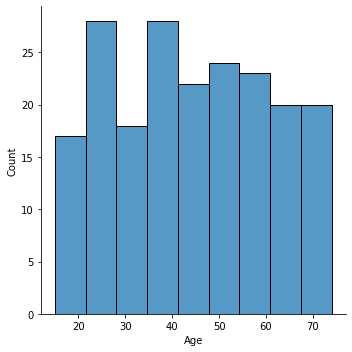

In [5]:
# Age distribution #Age range is between 15 and 74.
plt.figure(figsize = (9,5))
sns.displot(drug_data.Age)
plt.show()

In [6]:
drug_data.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

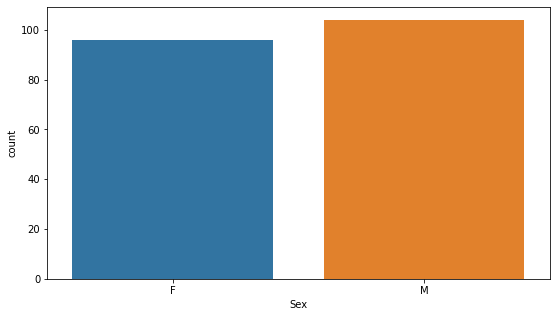

In [7]:
#Sex Distribution
plt.figure(figsize=(9,5))
sns.countplot(x = drug_data.Sex)
plt.show()

In [8]:
drug_data.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

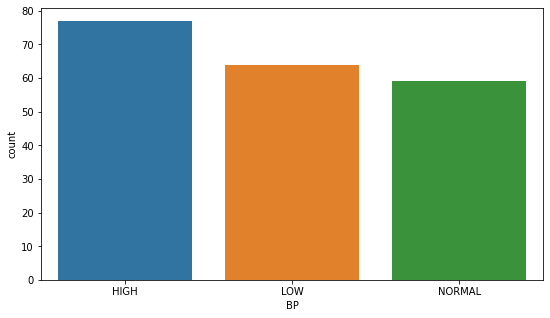

In [9]:
plt.figure(figsize = (9,5))
sns.countplot(x='BP',data=drug_data)
plt.show()

In [10]:
drug_data.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

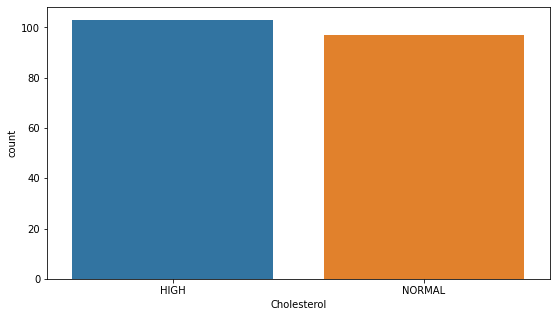

In [11]:
plt.figure(figsize = (9,5))
sns.countplot(x='Cholesterol',data=drug_data)
plt.show()

<Figure size 648x360 with 0 Axes>

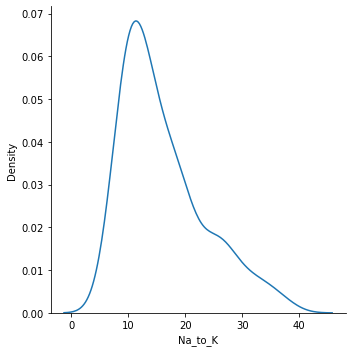

In [12]:
plt.figure(figsize = (9,5))
sns.displot(drug_data.Na_to_K,kind='kde')
plt.show()

In [13]:
drug_data.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

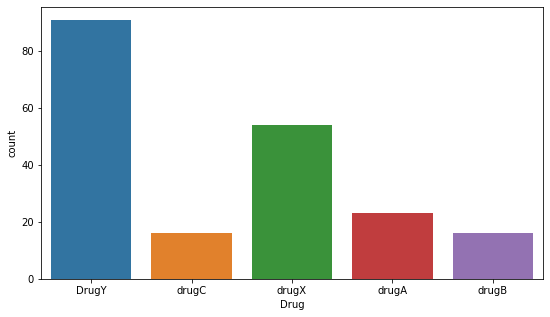

In [14]:
plt.figure(figsize = (9,5))
sns.countplot(x='Drug',data=drug_data)
plt.show()

Drug is target column and you can see that it is unbalanced dataset. Using Stratified K Fold cross-validation would be better for reliable results.

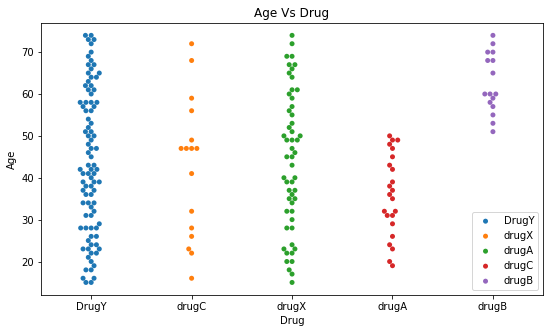

In [15]:
#Age Vs Drug
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = drug_data)
plt.legend(drug_data.Drug.value_counts().index)
plt.title("Age Vs Drug")
plt.show()

In [16]:
print("Minimum Age of DrugA",drug_data.Age[drug_data.Drug == "drugA"].min())
print("Minimum Age of DrugB",drug_data.Age[drug_data.Drug == "drugB"].min())
print("Minimum Age of DrugC",drug_data.Age[drug_data.Drug == "drugC"].min())
print("Minimum Age of DrugX",drug_data.Age[drug_data.Drug == "drugX"].min())
print("Minimum Age of DrugY",drug_data.Age[drug_data.Drug == "DrugY"].min())


Minimum Age of DrugA 19
Minimum Age of DrugB 51
Minimum Age of DrugC 16
Minimum Age of DrugX 15
Minimum Age of DrugY 15


In [17]:
print("Maximum Age of DrugA",drug_data.Age[drug_data.Drug == "drugA"].max())
print("Maximum Age of DrugB",drug_data.Age[drug_data.Drug == "drugB"].max())
print("Maximum Age of DrugC",drug_data.Age[drug_data.Drug == "drugC"].max())
print("Maximum Age of DrugX",drug_data.Age[drug_data.Drug == "drugX"].max())
print("Maximum Age of DrugY",drug_data.Age[drug_data.Drug == "DrugY"].max())


Maximum Age of DrugA 50
Maximum Age of DrugB 74
Maximum Age of DrugC 72
Maximum Age of DrugX 74
Maximum Age of DrugY 74


In [18]:
#Sex Vs Drug
drug_data_Sex_Drug = drug_data.groupby(["Drug","Sex"]).size()
drug_data_Sex_Drug

Drug   Sex
DrugY  F      47
       M      44
drugA  F       9
       M      14
drugB  F       6
       M      10
drugC  F       7
       M       9
drugX  F      27
       M      27
dtype: int64

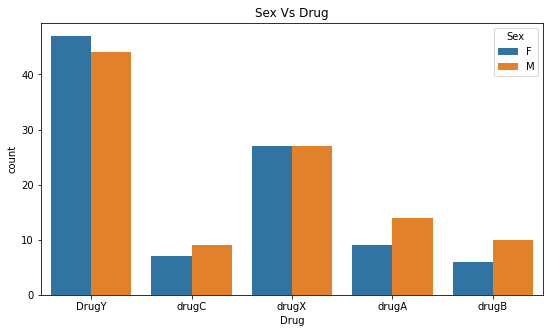

In [19]:
plt.figure(figsize = (9,5))
sns.countplot(x = "Drug",hue = "Sex",data = drug_data)
plt.title("Sex Vs Drug")
plt.show()

In [75]:
#BP Vs Drug
drug_data_BP_Drug = drug_data.groupby(["Drug","BP"]).size().reset_index(name='Count')
drug_data_BP_Drug.sort_values(by='Count')

,Drug,BP,Count
4,drugB,HIGH,16
5,drugC,LOW,16
6,drugX,LOW,18
2,DrugY,NORMAL,23
3,drugA,HIGH,23
1,DrugY,LOW,30
7,drugX,NORMAL,36
0,DrugY,HIGH,38


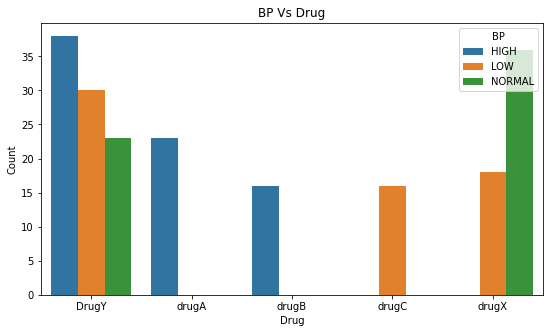

In [21]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = drug_data_BP_Drug)
plt.title("BP Vs Drug")
plt.show()

Drug X and Y possibly is not related to BP
Drug A and B for High BP
Drug C for low BP


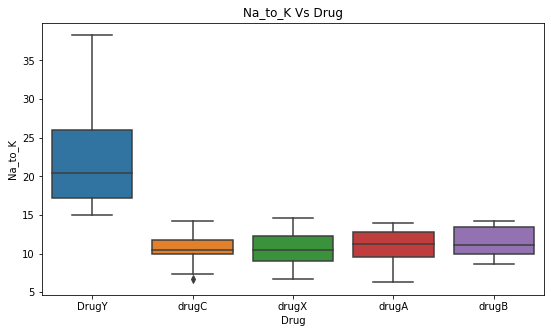

In [22]:
#Na_to_K Vs Drug
plt.figure(figsize = (9,5))
sns.boxplot(x = "Drug", y = "Na_to_K",data = drug_data)
plt.title("Na_to_K Vs Drug")
plt.show()

In [23]:
drug_data.groupby(["Drug"])[['Na_to_K']].min()

,Na_to_K
Drug,
DrugY,15.015
drugA,6.269
drugB,8.621
drugC,6.769
drugX,6.683


In [24]:
drug_data.groupby(["Drug"])[['Na_to_K']].max()

,Na_to_K
Drug,
DrugY,38.247
drugA,13.972
drugB,14.239
drugC,14.160
drugX,14.642


Drug Y related to high Na to K ratio

In [25]:
drug_data_CH_Drug = drug_data.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
drug_data_CH_Drug

,Drug,Cholesterol,Count
0,DrugY,HIGH,47
1,DrugY,NORMAL,44
2,drugA,HIGH,12
3,drugA,NORMAL,11
4,drugB,HIGH,8
5,drugB,NORMAL,8
6,drugC,HIGH,16
7,drugX,HIGH,20
8,drugX,NORMAL,34


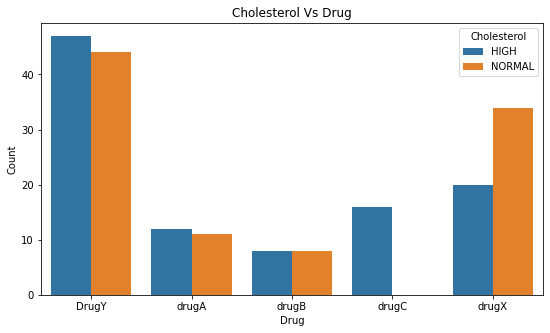

In [26]:
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = drug_data_CH_Drug)
plt.title("Cholesterol Vs Drug")
plt.show()

Drug C is for High Cholestrol

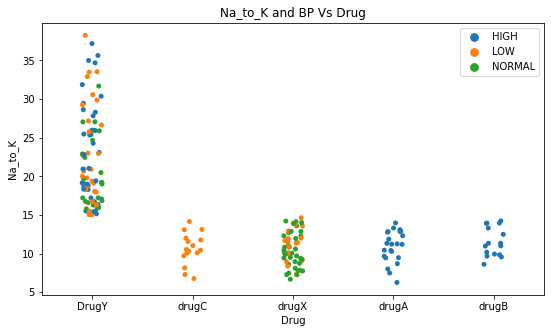

In [27]:
#Na_to_K and BP Vs Drug
plt.figure(figsize = (9,5))
sns.stripplot(x = "Drug", y = "Na_to_K",hue="BP",data = drug_data)
plt.legend()
plt.title("Na_to_K and BP Vs Drug")
plt.show()

# Feature Engineering

If Na_to_K is bigger than 15, it is always drugY.

In [28]:
HighNatoK=drug_data.Na_to_K.apply(lambda x: 1 if x>=15 else 0)
High_NatoK_ratio=pd.Series(HighNatoK,name='HighNatoK')
drug_data_1=pd.concat([drug_data,High_NatoK_ratio],axis=1)
drug_data_1


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,HighNatoK
0,23,F,HIGH,HIGH,25.355,DrugY,1
1,47,M,LOW,HIGH,13.093,drugC,0
2,47,M,LOW,HIGH,10.114,drugC,0
3,28,F,NORMAL,HIGH,7.798,drugX,0
4,61,F,LOW,HIGH,18.043,DrugY,1
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,0
196,16,M,LOW,HIGH,12.006,drugC,0
197,52,M,NORMAL,HIGH,9.894,drugX,0
198,23,M,NORMAL,NORMAL,14.020,drugX,0


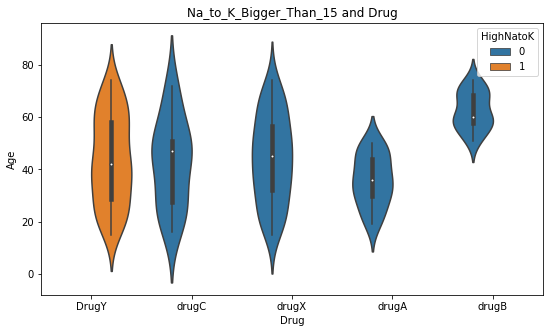

In [29]:
plt.figure(figsize = (9,5))
sns.violinplot(x = "Drug",y="Age",hue="HighNatoK", data = drug_data_1)
plt.title("Na_to_K_Bigger_Than_15 and Drug")
plt.show()

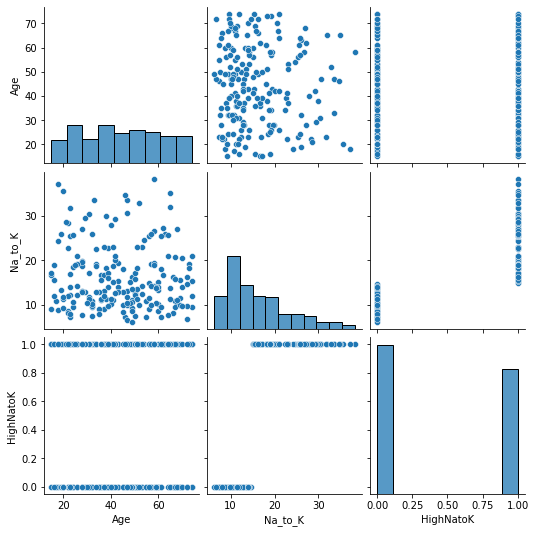

In [30]:
sns.pairplot(drug_data_1)

# Encoding

In [31]:
drug_data_1.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
HighNatoK        int64
dtype: object

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('ohe',OneHotEncoder(drop='first'),['Sex']),
                     ('oe',OrdinalEncoder(),['BP','Cholesterol'])],remainder='passthrough')

In [33]:
drug_data_2=ct.fit_transform(drug_data_1)
print(drug_data_1.head(15))
drug_data_2[0:15]

    Age Sex      BP Cholesterol  Na_to_K   Drug  HighNatoK
0    23   F    HIGH        HIGH   25.355  DrugY          1
1    47   M     LOW        HIGH   13.093  drugC          0
2    47   M     LOW        HIGH   10.114  drugC          0
3    28   F  NORMAL        HIGH    7.798  drugX          0
4    61   F     LOW        HIGH   18.043  DrugY          1
5    22   F  NORMAL        HIGH    8.607  drugX          0
6    49   F  NORMAL        HIGH   16.275  DrugY          1
7    41   M     LOW        HIGH   11.037  drugC          0
8    60   M  NORMAL        HIGH   15.171  DrugY          1
9    43   M     LOW      NORMAL   19.368  DrugY          1
10   47   F     LOW        HIGH   11.767  drugC          0
11   34   F    HIGH      NORMAL   19.199  DrugY          1
12   43   M     LOW        HIGH   15.376  DrugY          1
13   74   F     LOW        HIGH   20.942  DrugY          1
14   50   F  NORMAL        HIGH   12.703  drugX          0


array([[0.0, 0.0, 0.0, 23, 25.355, 'DrugY', 1],
       [1.0, 1.0, 0.0, 47, 13.093, 'drugC', 0],
       [1.0, 1.0, 0.0, 47, 10.114, 'drugC', 0],
       [0.0, 2.0, 0.0, 28, 7.798, 'drugX', 0],
       [0.0, 1.0, 0.0, 61, 18.043, 'DrugY', 1],
       [0.0, 2.0, 0.0, 22, 8.607, 'drugX', 0],
       [0.0, 2.0, 0.0, 49, 16.275, 'DrugY', 1],
       [1.0, 1.0, 0.0, 41, 11.037, 'drugC', 0],
       [1.0, 2.0, 0.0, 60, 15.171, 'DrugY', 1],
       [1.0, 1.0, 1.0, 43, 19.368, 'DrugY', 1],
       [0.0, 1.0, 0.0, 47, 11.767, 'drugC', 0],
       [0.0, 0.0, 1.0, 34, 19.199, 'DrugY', 1],
       [1.0, 1.0, 0.0, 43, 15.376, 'DrugY', 1],
       [0.0, 1.0, 0.0, 74, 20.942, 'DrugY', 1],
       [0.0, 2.0, 0.0, 50, 12.703, 'drugX', 0]], dtype=object)

# Choosing inputs and output

In [34]:
X=drug_data_1.drop(['Drug'],axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K,HighNatoK
0,23,F,HIGH,HIGH,25.355,1
1,47,M,LOW,HIGH,13.093,0
2,47,M,LOW,HIGH,10.114,0
3,28,F,NORMAL,HIGH,7.798,0
4,61,F,LOW,HIGH,18.043,1
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,0
196,16,M,LOW,HIGH,12.006,0
197,52,M,NORMAL,HIGH,9.894,0
198,23,M,NORMAL,NORMAL,14.020,0


In [35]:
y=drug_data_1['Drug']
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [36]:
Xnew=ct.fit_transform(X)
Xnew[:15]

array([[ 0.   ,  0.   ,  0.   , 23.   , 25.355,  1.   ],
       [ 1.   ,  1.   ,  0.   , 47.   , 13.093,  0.   ],
       [ 1.   ,  1.   ,  0.   , 47.   , 10.114,  0.   ],
       [ 0.   ,  2.   ,  0.   , 28.   ,  7.798,  0.   ],
       [ 0.   ,  1.   ,  0.   , 61.   , 18.043,  1.   ],
       [ 0.   ,  2.   ,  0.   , 22.   ,  8.607,  0.   ],
       [ 0.   ,  2.   ,  0.   , 49.   , 16.275,  1.   ],
       [ 1.   ,  1.   ,  0.   , 41.   , 11.037,  0.   ],
       [ 1.   ,  2.   ,  0.   , 60.   , 15.171,  1.   ],
       [ 1.   ,  1.   ,  1.   , 43.   , 19.368,  1.   ],
       [ 0.   ,  1.   ,  0.   , 47.   , 11.767,  0.   ],
       [ 0.   ,  0.   ,  1.   , 34.   , 19.199,  1.   ],
       [ 1.   ,  1.   ,  0.   , 43.   , 15.376,  1.   ],
       [ 0.   ,  1.   ,  0.   , 74.   , 20.942,  1.   ],
       [ 0.   ,  2.   ,  0.   , 50.   , 12.703,  0.   ]])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xnew,y,test_size=0.30,random_state=5)


# Model Implementation

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
skfold = StratifiedKFold(n_splits=5)

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [40]:
lr_trainscore=cross_val_score(lr_model,X_train,y_train,cv=skfold)
lr_pred=lr_model.predict(X_test)

In [41]:
print(lr_trainscore)
lr_trainscore.mean()

[0.89285714 0.89285714 0.89285714 0.85714286 0.89285714]


0.8857142857142858

In [42]:
lr_testscore=lr_model.score(X_test,y_test)
lr_testscore

0.9166666666666666

In [43]:
#To store the scores of different model
result_dict_train={}
result_dict_test={}

In [44]:
result_dict_train["LR Train Score"] = np.mean(lr_trainscore)
result_dict_test["LR Test Score"] = lr_testscore

Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=5)
rfc.fit(X_train,y_train)
rfc_trainscore=cross_val_score(rfc,X_train,y_train,cv=skfold)
rfc_trainscore

array([0.96428571, 0.96428571, 0.96428571, 0.92857143, 0.96428571])

In [46]:
rfc_pred=rfc.predict(X_test)

In [47]:
print(rfc_trainscore.mean())
rfc_testscore=rfc.score(X_test,y_test)
rfc_testscore

0.9571428571428571


0.9

In [48]:
result_dict_train["RFC Train Score"] = np.mean(rfc_trainscore)
result_dict_test["RFC Test Score"] = rfc_testscore

KNN Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,p=1)
knn.fit(X_train,y_train)
knn_trainscore=cross_val_score(knn,X_train,y_train,cv=skfold)
knn_trainscore

array([0.82142857, 0.64285714, 0.67857143, 0.75      , 0.82142857])

In [50]:
knn_pred=knn.predict(X_test)

In [51]:
print(knn_trainscore.mean())
knn_testscore=knn.score(X_test,y_test)
knn_testscore

0.7428571428571429


0.7166666666666667

In [52]:
result_dict_train["KNN Train Score"] = np.mean(knn_trainscore)
result_dict_test["KNN Test Score"] = knn_testscore

SVM Classifier

In [53]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=0.05,gamma=0.5)
svc.fit(X_train,y_train)
svc_trainscore=cross_val_score(svc,X_train,y_train,cv=skfold)
svc_trainscore

array([0.89285714, 0.92857143, 0.78571429, 0.89285714, 0.92857143])

In [54]:
svc_pred=svc.predict(X_test)

In [55]:
print(svc_trainscore.mean())
svc_testscore=svc.score(X_test,y_test)
svc_testscore

0.8857142857142858


0.8833333333333333

In [56]:
result_dict_train["SVC Train Score"] = np.mean(svc_trainscore)
result_dict_test["SVC Test Score"] = svc_testscore

Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(X_train,y_train)
nbc_trainscore=cross_val_score(nbc,X_train,y_train,cv=skfold)
nbc_trainscore

array([0.96428571, 1.        , 1.        , 1.        , 1.        ])

In [58]:
nbc_pred=nbc.predict(X_test)

In [59]:
print(nbc_trainscore.mean())
nbc_testscore=nbc.score(X_test,y_test)
nbc_testscore

0.9928571428571429


1.0

In [60]:
result_dict_train["NBC Train Score"] = np.mean(nbc_trainscore)
result_dict_test["NBC Test Score"] = nbc_testscore

In [61]:
result_dict_train

{'LR Train Score': 0.8857142857142858,
 'RFC Train Score': 0.9571428571428571,
 'KNN Train Score': 0.7428571428571429,
 'SVC Train Score': 0.8857142857142858,
 'NBC Train Score': 0.9928571428571429}

# Conclusion

In [62]:
train_result=pd.DataFrame.from_dict(result_dict_train,orient="index",columns=["Score"])
train_result

,Score
LR Train Score,0.885714
RFC Train Score,0.957143
KNN Train Score,0.742857
SVC Train Score,0.885714
NBC Train Score,0.992857


In [63]:
test_result=pd.DataFrame.from_dict(result_dict_test,orient="index",columns=["TestScore"])
test_result

,TestScore
LR Test Score,0.916667
RFC Test Score,0.900000
KNN Test Score,0.716667
SVC Test Score,0.883333
NBC Test Score,1.000000


In [64]:
#Hypertuning SVM using Grid Search CV
grid = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

svmg  = SVC ();
svm_cv = GridSearchCV(svmg, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))


Best Parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 1.0
Test Score: 1.0


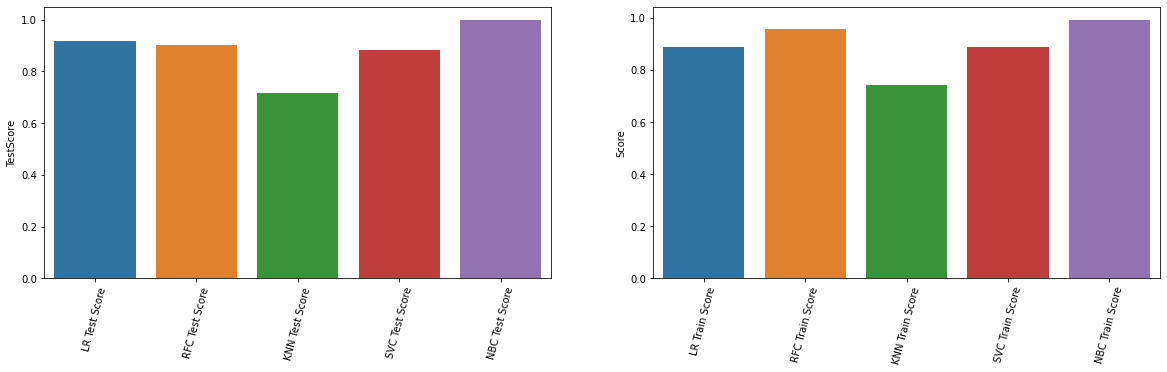

In [65]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = test_result.index,y = test_result.TestScore,ax = ax[0])
sns.barplot(x = train_result.index,y = train_result.Score,ax = ax[1])
ax[0].set_xticklabels(test_result.index,rotation = 75)
ax[1].set_xticklabels(train_result.index,rotation = 75)
plt.show()

Classification has been done using Logistic Regression,Random Forest,KNN,SVM,Naive Bayes algorithms.
KNN classifier has worst score among these classifiers.